In [1]:
pip install matplotlib


     ---------------------------------------- 7.5/7.5 MB 732.3 kB/s eta 0:00:00
     ------------------------------------ 470.9/470.9 kB 776.8 kB/s eta 0:00:00
     ---------------------------------------- 2.0/2.0 MB 767.7 kB/s eta 0:00:00
     ---------------------------------------- 55.4/55.4 kB 1.5 MB/s eta 0:00:00
     ---------------------------------------- 2.5/2.5 MB 759.1 kB/s eta 0:00:00
     -------------------------------------- 98.3/98.3 kB 808.2 kB/s eta 0:00:00



[notice] A new release of pip available: 22.3.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
pip install seaborn

     ------------------------------------ 293.3/293.3 kB 862.9 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
titanic = pd.read_csv('https://raw.githubusercontent.com/mwaskom/seaborn-data/master/titanic.csv')

In [5]:
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [6]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    object 
 3   age          714 non-null    float64
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   fare         891 non-null    float64
 7   embarked     889 non-null    object 
 8   class        891 non-null    object 
 9   who          891 non-null    object 
 10  adult_male   891 non-null    bool   
 11  deck         203 non-null    object 
 12  embark_town  889 non-null    object 
 13  alive        891 non-null    object 
 14  alone        891 non-null    bool   
dtypes: bool(2), float64(2), int64(4), object(7)
memory usage: 92.4+ KB


In [7]:
titanic_clean = titanic[['survived','pclass','sex','age','sibsp','parch','fare','embarked','deck']]

In [8]:
titanic_clean

,survived,pclass,sex,age,sibsp,parch,fare,embarked,deck
0,0,3,male,22.0,1,0,7.2500,S,NaN
1,1,1,female,38.0,1,0,71.2833,C,C
2,1,3,female,26.0,0,0,7.9250,S,NaN
3,1,1,female,35.0,1,0,53.1000,S,C
4,0,3,male,35.0,0,0,8.0500,S,NaN
...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,NaN
887,1,1,female,19.0,0,0,30.0000,S,B
888,0,3,female,NaN,1,2,23.4500,S,NaN
889,1,1,male,26.0,0,0,30.0000,C,C


In [9]:
titanic_clean.groupby('sex')['age'].mean()

sex
female    27.915709
male      30.726645
Name: age, dtype: float64

In [10]:
titanic_clean.groupby('pclass')['age'].mean()

pclass
1    38.233441
2    29.877630
3    25.140620
Name: age, dtype: float64

In [11]:
titanic_clean['age'].fillna(titanic_clean['age'].mean())

0      22.000000
1      38.000000
2      26.000000
3      35.000000
4      35.000000
         ...    
886    27.000000
887    19.000000
888    29.699118
889    26.000000
890    32.000000
Name: age, Length: 891, dtype: float64

In [12]:
titanic_clean['age'].fillna(titanic_clean.groupby('pclass')['age'].transform('mean'))

0      22.00000
1      38.00000
2      26.00000
3      35.00000
4      35.00000
         ...   
886    27.00000
887    19.00000
888    25.14062
889    26.00000
890    32.00000
Name: age, Length: 891, dtype: float64

In [13]:
titanic_clean['age'] = titanic_clean['age'].fillna(titanic_clean.groupby('pclass')['age'].transform('mean'))

C:\Users\fishb\AppData\Local\Temp\ipykernel_31112\3577987120.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titanic_clean['age'] = titanic_clean['age'].fillna(titanic_clean.groupby('pclass')['age'].transform('mean'))


In [14]:
titanic_clean.drop('deck', axis=1, inplace=True)

C:\Users\fishb\AppData\Local\Temp\ipykernel_31112\2286092298.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titanic_clean.drop('deck', axis=1, inplace=True)


In [15]:
titanic_clean.groupby('survived').count()

,pclass,sex,age,sibsp,parch,fare,embarked
survived,,,,,,,
0,549,549,549,549,549,549,549
1,342,342,342,342,342,342,340


<Axes: xlabel='survived'>

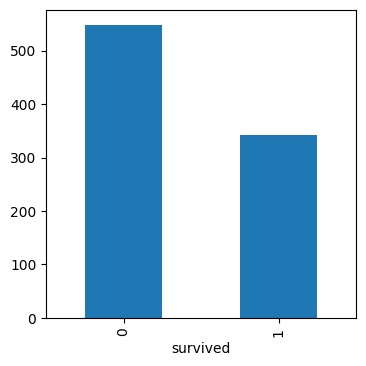

In [17]:
titanic_clean.groupby('survived')['pclass'].count().plot(kind='bar',figsize=(4,4))

<Axes: title={'center': 'Survival Counts'}, xlabel='survived', ylabel='Count of Passengers'>

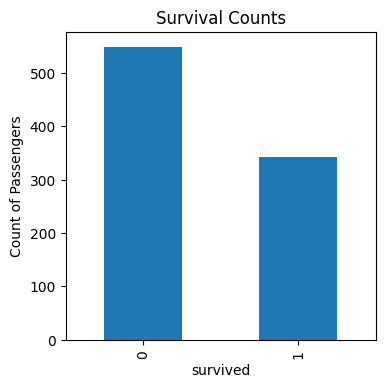

In [18]:
titanic_clean.groupby('survived')['pclass'].count().plot(kind='bar', figsize=(4,4), title='Survival Counts', ylabel='Count of Passengers')

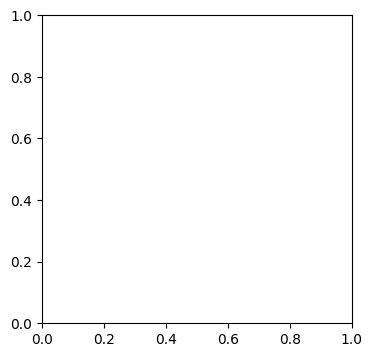

In [19]:
fig, (ax) = plt.subplots(1,1, figsize=(4,4))


In [20]:
titanic_clean.groupby('survived')['pclass'].count()\
.plot(ax=ax, kind='bar', title='Survival Counts', ylabel='Count of Passengers')

<Axes: title={'center': 'Survival Counts'}, xlabel='survived', ylabel='Count of Passengers'>

In [21]:
ax.annotate(titanic_clean.groupby('survived')['pclass'].count().loc[0],(0,300), ha='center', color='white', fontsize=15)
ax.annotate(titanic_clean.groupby('survived')['pclass'].count().loc[1],(1,200), ha='center', color='white', fontsize=15)

Text(1, 200, '342')

In [22]:
ax.annotate(titanic_clean.groupby('survived')['pclass'].count().loc[i],(i,(titanic_clean.groupby('survived')['pclass'].count().loc[i]/2)), ha='center', color='white', fontsize=15)

NameError: name 'i' is not defined

<Axes: xlabel='survived'>

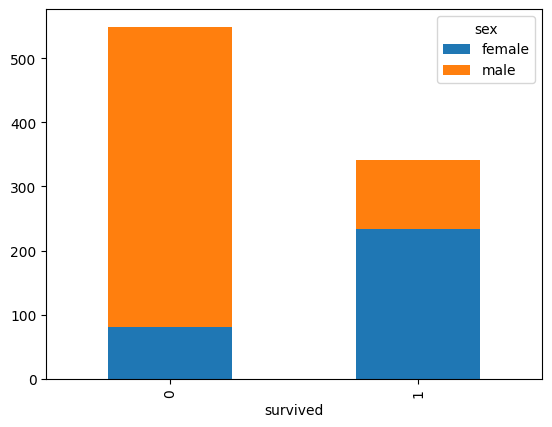

In [23]:
titanic_clean.groupby(['survived','sex'])['pclass'].count().unstack().plot(kind='bar', stacked=True)

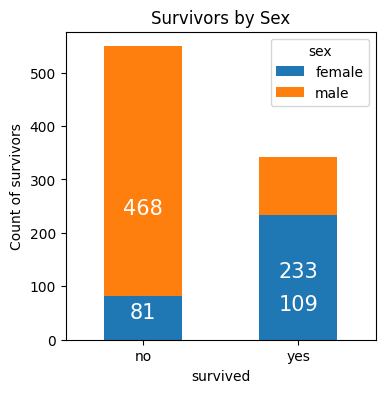

In [24]:
fig, (ax) = plt.subplots(1,1, figsize=(4,4))

# create a plot with pandas plot
titanic_clean.groupby(['survived','sex'])['pclass'].count().unstack().plot(kind='bar',
                                                                            stacked=True, ax=ax, title='Survivors by Sex',
                                                                            ylabel='Count of survivors')

for i in range(2):
    ax.annotate(titanic_clean.groupby(['survived','sex'])['pclass'].count().unstack().iloc[i,0],(i,(titanic_clean.groupby(['survived','sex'])['pclass'].count().unstack().iloc[i,0]/2)), ha='center', color='white', fontsize=15)
    ax.annotate(titanic_clean.groupby(['survived','sex'])['pclass'].count().unstack().iloc[i,1],(i,(titanic_clean.groupby(['survived','sex'])['pclass'].count().unstack().iloc[i,1]/2)), ha='center', color='white', fontsize=15)

ax.set_xticks(labels=['no','yes'], ticks=[0,1], rotation=360)

<Axes: xlabel='survived,pclass'>

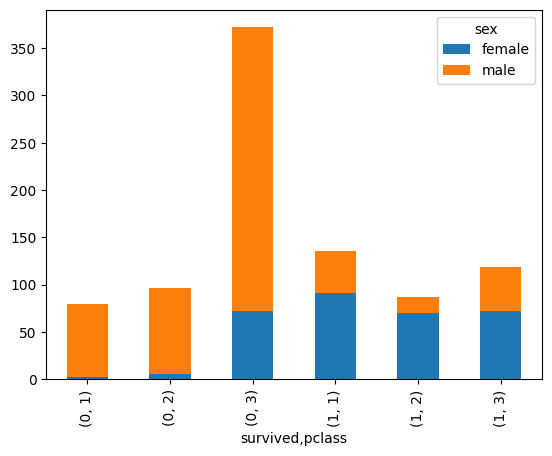

In [25]:
titanic_clean.groupby(['survived','pclass','sex'])['age'].count().unstack().plot(kind='bar',stacked=True)

In [26]:
titanic_clean

,survived,pclass,sex,age,sibsp,parch,fare,embarked
0,0,3,male,22.00000,1,0,7.2500,S
1,1,1,female,38.00000,1,0,71.2833,C
2,1,3,female,26.00000,0,0,7.9250,S
3,1,1,female,35.00000,1,0,53.1000,S
4,0,3,male,35.00000,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.00000,0,0,13.0000,S
887,1,1,female,19.00000,0,0,30.0000,S
888,0,3,female,25.14062,1,2,23.4500,S
889,1,1,male,26.00000,0,0,30.0000,C


In [27]:
sns.histplot(titanic_clean['family_size'])

KeyError: 'family_size'

In [28]:
titanic_clean['family_size'] = titanic_clean['sibsp'] + titanic_clean['parch'] + 1

C:\Users\fishb\AppData\Local\Temp\ipykernel_31112\236648576.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titanic_clean['family_size'] = titanic_clean['sibsp'] + titanic_clean['parch'] + 1


<Axes: xlabel='family_size', ylabel='Count'>

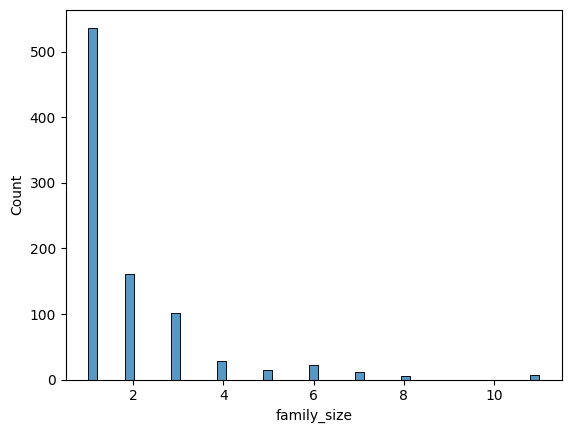

In [29]:
sns.histplot(titanic_clean['family_size'])

<Axes: xlabel='age', ylabel='Count'>

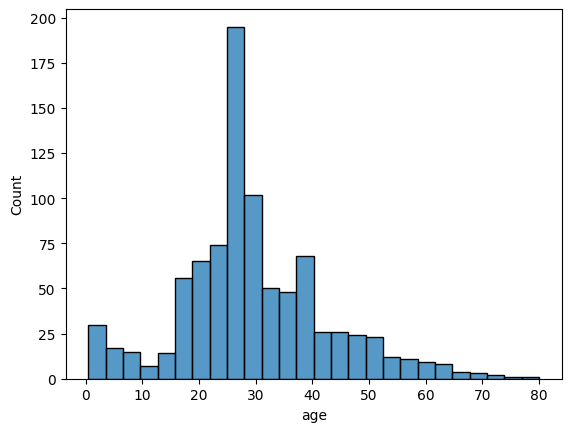

In [30]:
sns.histplot(titanic_clean['age'])

<Axes: xlabel='age', ylabel='family_size'>

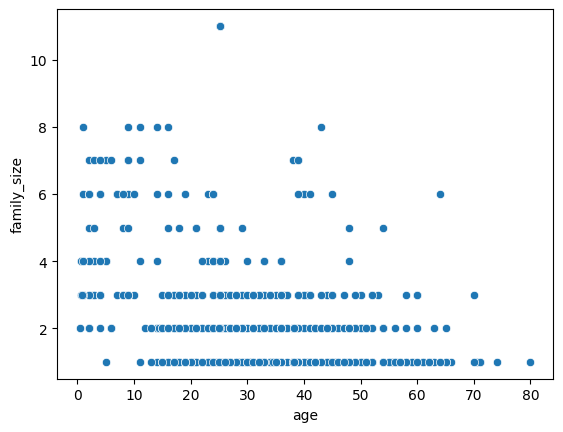

In [31]:
sns.scatterplot(x='age',y='family_size',data=titanic_clean)